In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys

In [31]:
path = '/Users/ngochoang/Library/CloudStorage/GoogleDrive-nhungoc1508@gmail.com/My Drive/Graduate/Semester 1 (Fall 2024)/INFO-H423 Data Mining/Project/SNCB_IncidentClassifier/models/anomaly_detection'
os.chdir(path)
os.getcwd()

'/Users/ngochoang/Library/CloudStorage/GoogleDrive-nhungoc1508@gmail.com/My Drive/Graduate/Semester 1 (Fall 2024)/INFO-H423 Data Mining/Project/SNCB_IncidentClassifier/models/anomaly_detection'

In [32]:
dirs = []
for f in os.listdir('./results'):
    if '.' not in f:
        dirs.append(f)
dirs[-1]

'20241127_221603_w200_l15'

In [33]:
results = []
for dir in dirs:
    file_path = f'{os.getcwd()}/results/{dir}/NDCG.json'
    _, _, w, l = dir.split('_')
    ret = dict()
    ret['w'] = int(w[1:])
    ret['l'] = int(l[1:])
    try:
        with open(file_path, 'r') as file:
            scores = json.load(file)
            ret['ndcg_mean'] = scores['ndcg_mean']
            ret['ndcg_median'] = scores['ndcg_median']
    except:
        print(f'{w}_{l} has no results')
        ret['ndcg_mean'] = np.nan
        ret['ndcg_median'] = np.nan
    results.append(ret)

w150_l5 has no results
w150_l10 has no results
w100_l5 has no results
w120_l5 has no results
w150_l10 has no results
w70_l3 has no results
w100_l3 has no results
w120_l3 has no results
w150_l7 has no results
w150_l3 has no results


In [34]:
scores_df = pd.DataFrame.from_dict(results)
scores_df = scores_df.sort_values(by=['w', 'l'], ascending=[False, True])
scores_df = scores_df.reset_index().drop(columns=['index'], axis=1)
scores_df

,w,l,ndcg_mean,ndcg_median
0,200,15,0.476787,0.462284
1,200,20,0.471948,0.453771
2,150,3,NaN,NaN
3,150,5,NaN,NaN
4,150,7,0.495365,0.481288
5,150,7,0.897949,0.989816
6,150,7,NaN,NaN
7,150,10,0.895801,0.987925
8,150,10,NaN,NaN
9,150,10,NaN,NaN


/var/folders/2l/srpzk4jx3bd_85xnzblspysc0000gn/T/ipykernel_38309/2580968496.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 576x432 with 0 Axes>

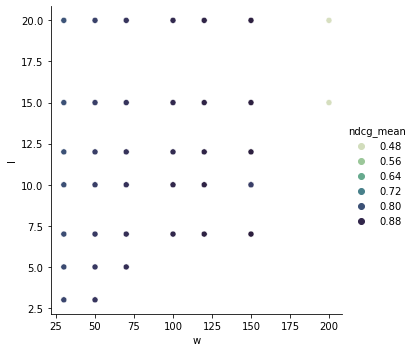

In [35]:
fig = plt.figure(figsize=(8, 6))

cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
g = sns.relplot(
    data=scores_df,
    x="w", y="l",
    hue="ndcg_mean",
    palette=cmap, sizes=(10, 200)
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
# g.despine(left=True, bottom=True)

fig.show()

In [36]:
# df_count.pivot_table(index='race_agg', columns='profession', values='nconst')
scores_pv = scores_df.pivot_table(index='w', columns='l', values='ndcg_mean', aggfunc=max).sort_index(ascending=False)
scores_pv

l,3,5,7,10,12,15,20
w,,,,,,,
200,NaN,NaN,NaN,NaN,NaN,0.476787,0.471948
150,NaN,NaN,0.897949,0.895801,0.894840,0.893031,0.894549
120,NaN,NaN,0.889391,0.887423,0.884912,0.884766,0.884090
100,NaN,NaN,0.878085,0.876747,0.869573,0.874293,0.871619
70,NaN,0.863744,0.859973,0.855793,0.853355,0.852230,0.850884
50,0.850265,0.842299,0.840303,0.833887,0.833701,0.830606,0.827579
30,0.821747,0.810977,0.807366,0.802509,0.801302,0.799285,0.796008


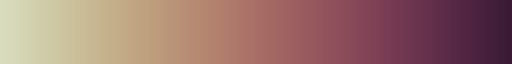

In [37]:
cmap = sns.cubehelix_palette(start=.25, rot=.5, as_cmap=True)
cmap

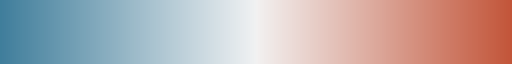

In [38]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap

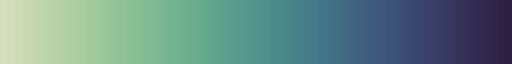

In [39]:
cmap = sns.cubehelix_palette(start=0.5, rot=-.75, as_cmap=True)
cmap

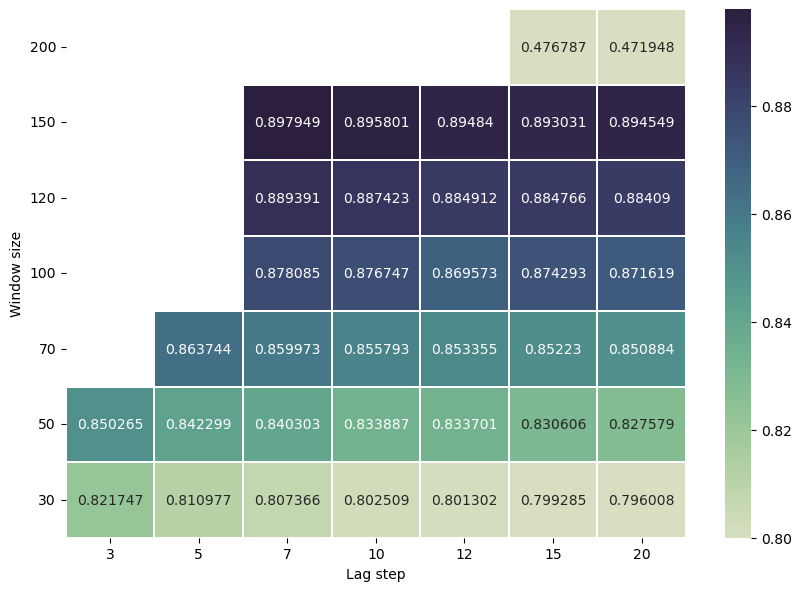

In [40]:
plt.figure(figsize=(10, 7), dpi=100)

vmax = scores_pv.fillna(0).values.max()
sns.heatmap(scores_pv, linewidth=0.3, annot=True, fmt='n', cmap=cmap, mask=scores_pv.isnull(),
            vmin=0.8, vmax=vmax)
plt.xlabel('Lag step')
plt.ylabel('Window size')
plt.yticks(rotation=0)

plt.show()